#  Laboratorio #2: Operaciones Básicas de Manipulación de Imágenes

## 2. Cargar imágenes al entorno de trabajo
1. Cargar la imagen de prueba belka-strelka.png como una variable al entorno de trabajo utilizando la librería PIL

In [3]:
from PIL import Image
belka_bleka=Image.open(r'C:\Users\EZEQUIEL\OneDrive - Universidad Tecnológica de Panamá\vs code\vision artificial\2024_02_1152_Lab03_Jaramillo')
belka_bleka.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\EZEQUIEL\\OneDrive - Universidad Tecnológica de Panamá\\vs code\\vision artificial\\2024_02_1152_Lab03_Jaramillovision artificial\\2024_02_1152_Lab03_Jaramillo\\belka-strelka.png'

 2. Convertir esta variable a un arreglo de numpy mediante la función np.array().

In [2]:
import numpy as np

arreglo_belka=np.array(belka_bleka)
arreglo_belka=np.transpose(arreglo_belka, (0,1, 2))

3. Confirmar que el arreglo de numpy con la imagen contenga una matriz de 3 dimensiones.

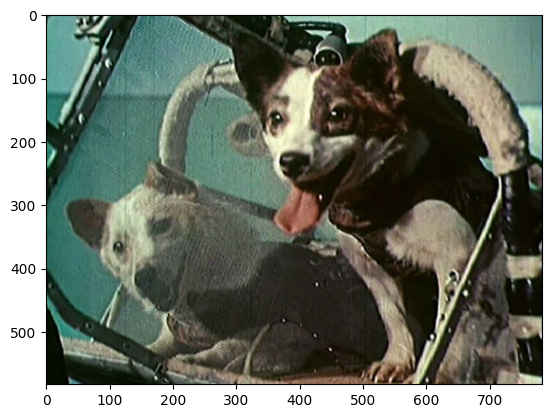

(583, 783, 3)


In [3]:
import matplotlib.pyplot as plt
ima=plt.imshow(belka_bleka)
plt.show()

print(arreglo_belka.shape)


 4. Definir una función llamada cargar_imagen_np(x) cuya entrada sea un string con la ubicación de un archivo de
 imagen, y produzca como salida una imagen en formato de arreglo de numpy

(583, 783, 3)


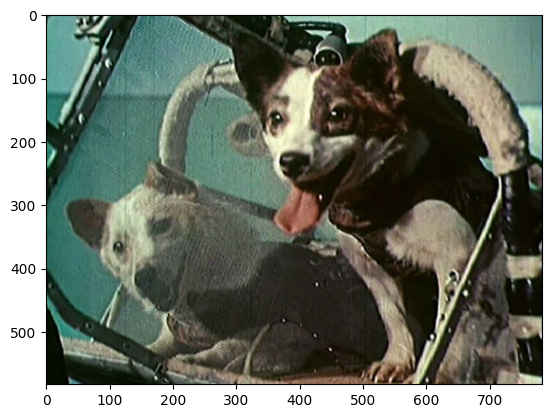

In [4]:
def cargar_imagen_np(x):
    import numpy as np 
    from PIL import Image
    imaganen_cargada=Image.open(rf'{x}')
    arreglo_imagen=np.array(imaganen_cargada)
    return arreglo_imagen
belk=cargar_imagen_np('C:/Users/EZEQUIEL/OneDrive - Universidad Tecnológica de Panamá/vs code/vision artificial/belka-strelka.png')
print(belk.shape)
plt.imshow(belk)
plt.show()

 5. Definir una función llamada cargar_imagen_gris_np(x) cuya entrada sea un string con la ubicación de un archivo
 de imagen,y produzca como  salida una imagen en escala degrises enformato dearreglo de  numpy. Apóyese en el método 
 .convert()

In [5]:
def cargar_imagen_gris_np(x):
    import numpy as np
    from PIL import Image
    imaganen_color=Image.open(rf'{x}')
    imagen_gris= imaganen_color.convert('L')
    imagen_gris=np.array(imagen_gris)
    return imagen_gris



 6. Confirmar que el arreglo de numpy con la imagen contenga una matriz de 2 dimensiones.
 

In [6]:
imagane_cargada_gris=cargar_imagen_gris_np('C:/Users/EZEQUIEL/OneDrive - Universidad Tecnológica de Panamá/vs code/vision artificial/belka-strelka.png')
print(imagane_cargada_gris.shape)

(583, 783)


 7. Graficar la imagen de prueba al cargarse con la función cargar_imagen_gris_np(x).Utilizarelmétodo.imshow()
 con el argumento cmap=’gray’.

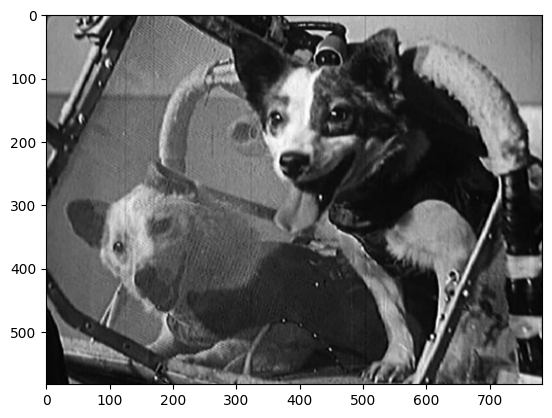

In [7]:
plt.imshow(imagane_cargada_gris,cmap='gray')
plt.show()

## 3. Normalización de Imágenes

1. Para la imagen en escala de grises cargada mediante la función cargar_imagen_gris_np(x), encontrar sus valores
 mínimo y máximo utilizando las funciones np.min() y np.max() respectivamente.

In [8]:
valor_min=np.min(imagane_cargada_gris)
valor_max=np.max(imagane_cargada_gris)
print(f'valor minimo:{valor_min}')
print(f'valor maximo: {valor_max}')

valor minimo:0
valor maximo: 255


 2. Definir una función normalizar_imagen(x) que tome como entrada una imagen en forma de arreglo de numpy y
 devuelva la imagen normalizada con valores entre 0 y 1. La normalización se debe realizar utilizando la fórmula:

      $x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)}$

      donde min(x) y max(x) representan el valor mínimo y máximo en la imagen original, respectivamente.


In [9]:
def normalizar_imagen(x):
    imanen_norm= (x - np.min(x))/(np.max(x) - np.min(x))
    return imanen_norm




 3. Aplicar la función normalizar_imagen() a la imagen en escala de grises y almacenar el resultado en una nueva
 variable.

In [10]:
imagen_gris_norm=normalizar_imagen(imagane_cargada_gris)

4. Confirmar que los valores de la imagen normalizada estén en el rango de 0 a 1. Para esto, verificar los valores mínimo y
 máximo de la imagen normalizada utilizando nuevamente np.min() y np.max().

In [11]:
norm_min=np.min(imagen_gris_norm)
norm_max=np.max(imagen_gris_norm)
print(f'valor minimo de la imagen normalizada: {norm_min}')
print(f'\nvalor maximo de la imagen normalizada: {norm_max}')

valor minimo de la imagen normalizada: 0.0

valor maximo de la imagen normalizada: 1.0


5. Graficar, una al lado de la otra, la imagen producida por la función cargar_imagen_gris_np(x), y la imagen pro
ducida por la nueva función normalizar_imagen().

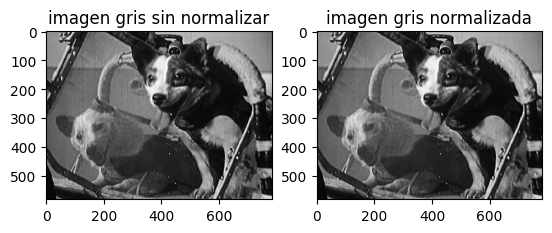

In [12]:
plt.subplot(1,2,1)
plt.imshow(imagane_cargada_gris, cmap='gray')
plt.title('imagen gris sin normalizar')

plt.subplot(1,2,2)
plt.imshow(imagen_gris_norm, cmap='gray')
plt.title('imagen gris normalizada')
plt.show()

 6. Comente sobre cualquier diferencia que observe entre ambas imágenes, y posibles explicaciones para estas diferencias.
    * Visualmente mis ojos no son capaces de percibir ningún cambio en las imágenes aun después de que verifiqué el interior de la matriz para asegurarme que si hubo una normalización y de haber usado la tonalidad ‘viridis’ que me ayuda a ver mas me ayuda a mi particalrmente a ver mejor los contrastes.

## 4. Manipulación Básica de Imágenes

 1. Definir una función extraer_cuadrante(img, num)quereciba como entradas una imagen en forma de arreglo de
 numpyyunnúmeroenteroentre 1y4. Lafunción debe devolver, de acuerdo al valor del segundo argumento, el cuadrante
 correspondiente de la imagen:
    * 1: Cuadrante superior izquierdo.
    * 2: Cuadrante superior derecho.
    * 3: Cuadrante inferior izquierdo.
    * 4: Cuadrante inferior derecho.
    
 Utilizar las dimensiones de la imagen para calcular los índices de corte.

In [13]:
def extraer_cuadrante(img, num):
    from PIL import Image
    import numpy as np
    imagen_png=Image.fromarray((img*255).astype('uint8'))
    ancho, alto = imagen_png.size
    if num==1:
        im_cortada1=imagen_png.crop((0,0,ancho/2,alto/2))
    elif num==2:
        im_cortada1=imagen_png.crop((ancho/2,0,ancho,alto/2))
    elif num==3:
        im_cortada1=imagen_png.crop((0,alto/2,ancho/2,alto))
    elif num==4:
        im_cortada1=imagen_png.crop((ancho/2,alto/2,ancho,alto))
    return im_cortada1


2. Aplicar la función extraer_cuadrante() a la imagen normalizada y mostrar los resultados de cada cuadrante.

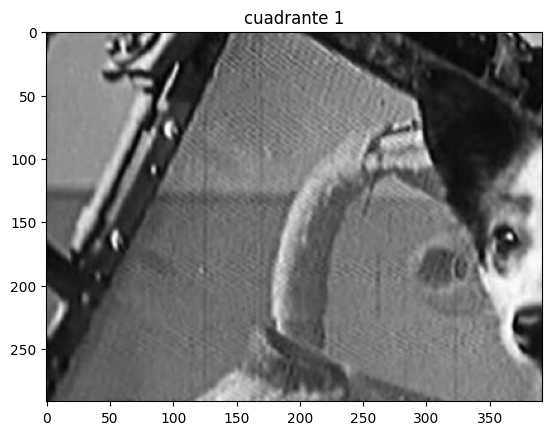

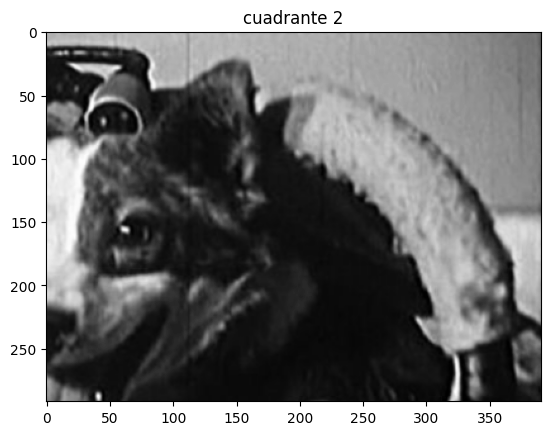

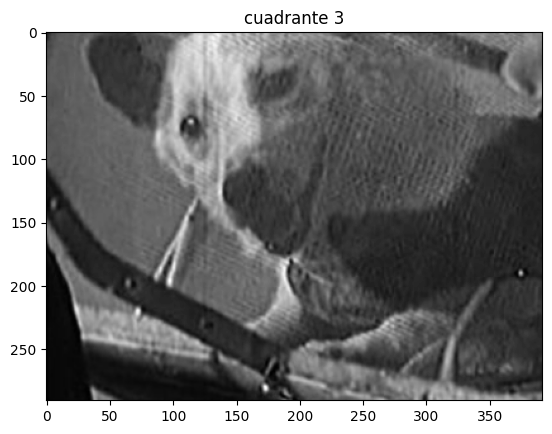

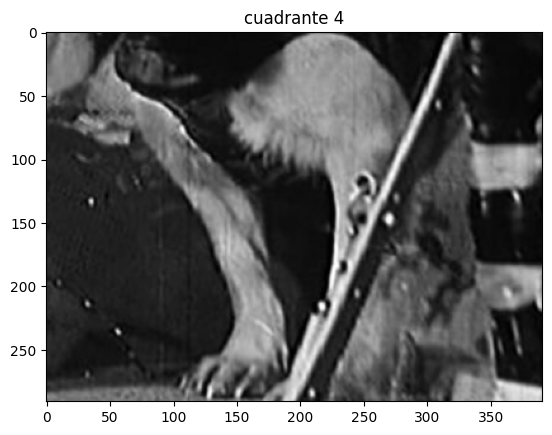

In [14]:
im1=extraer_cuadrante(imagen_gris_norm,1)
im2=extraer_cuadrante(imagen_gris_norm,2)
im3=extraer_cuadrante(imagen_gris_norm,3)
im4=extraer_cuadrante(imagen_gris_norm,4)

plt.imshow(im1,cmap='gray')
plt.title('cuadrante 1')
plt.show()

plt.imshow(im2,cmap='gray')
plt.title('cuadrante 2')
plt.show()

plt.imshow(im3,cmap='gray')
plt.title('cuadrante 3')
plt.show()

plt.imshow(im4,cmap='gray')
plt.title('cuadrante 4')
plt.show()

3. Encoger la imagen normalizada para que su tamaño (en ambas dimensiones espaciales) sea la mitad del original utilizando
 la función resize() de la librería PIL. Almacenar el resultado en una nueva variable.

In [15]:
im_encoj=Image.fromarray((imagen_gris_norm*255))
ancho, alto=im_encoj.size
imagen_encojida=im_encoj.resize((ancho//2,alto//2))


4. Volver a expandir la imagen encogida a su tamaño original. Graficar, una al lado de la otra, la imagen original y la imagen
 que fue encogida y luego expandida a su tamaño original.

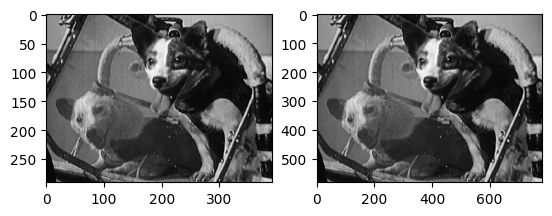

In [16]:
imagen_agrandada=imagen_encojida.resize((ancho,alto))
plt.subplot(1,2,1)
plt.imshow(imagen_encojida,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(imagen_agrandada,cmap='gray')
plt.show()

 5. Comente sobre cualquier diferencia de calidad que observe entre ambas imágenes, y posibles explicaciones para estas
 diferencias.
    * A simple vista la diferencia mas notable es la diferencia de escala en las axisas de la gráfica, pero a nivel de imagen quizá la imagen grande se percibe un poco mas borrosa debido a la expansión a la que fue sometida pero es una diferencia muy difícil de percibir 

6. Rotar la imagen normalizada 90 grados y mostrar el resultado.

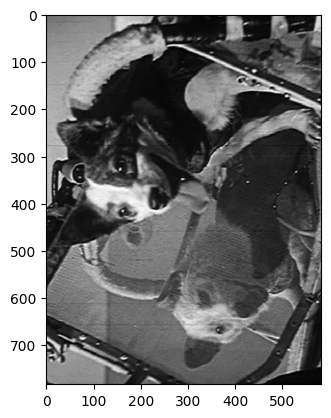

In [17]:
import PIL
imagen_rotada=im_encoj.rotate(90,PIL.Image.NEAREST, expand=1)

plt.imshow(imagen_rotada)
plt.show()

## 5. Operaciones a Nivel de Pixel

1. Definir una función niveles_intensidad_2(img) que tome como entrada la imagen de prueba en escala de grises
 normalizada entre 0 y 1, y produzca como salida una imagen en blanco y negro. Para esto, se debe aplicar la siguiente regla
 a cada pixel:
    * Si el valor del pixel es ≥ 0,5, cambiar el valor del pixel a 1.
    * Si el valor del pixel es < 0,5, cambiar el valor del pixel a 0.

    
 Esta operación efectivamente convierte la imagen en escala de grises a una imagen con únicamente 2 niveles de intensidad
 (0 y 1).

In [18]:
def niveles_intensidad_2(img):
    intensidad2 = np.zeros((img.shape[0], img.shape[1]))
    intensidad2[(img>=0.5)]=1
    intensidad2[(img<0.5)]=0
    return intensidad2
intesidad2=niveles_intensidad_2(imagen_gris_norm)
        

2. Graficar, una al lado de la otra, la imagen original y la imagen con 2 niveles de intensidad.

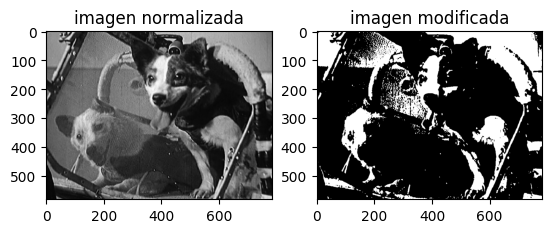

In [19]:
plt.subplot(1,2,1)
plt.imshow(imagen_gris_norm,cmap='gray')
plt.title('imagen normalizada')

plt.subplot(1,2,2)
plt.imshow(intesidad2, cmap='gray')
plt.title('imagen modificada')

plt.show()

 3. Definir una función niveles_intensidad_3(img) que tome como entrada la imagen de prueba en escala de grises
 normalizada entre 0 y 1, y produzca como salida una imagen con tres niveles de intensidad. Para esto, se debe aplicar la
 siguiente regla a cada pixel:
    * Si el valor del pixel es ≥ 0,66, cambiar el valor del pixel a 1.
    * Si el valor del pixel es 0,33 ≤ 𝑥 < 0,66, cambiar el valor del pixel a 0.5.
    * Si el valor del pixel es < 0,33, cambiar el valor del pixel a 0.

    
 Esta operación efectivamente convierte la imagen en escala de grises a una imagen con únicamente 3 valores de intensidad
 (0, 0.5, y 1).

In [20]:
def niveles_intensidad_3(img):
    intensidad3 = np.zeros((img.shape[0], img.shape[1]))
    intensidad3[(img>=0.66)]=1
    intensidad3[(img>=0.33) & (img<0.66)]=0.5
    intensidad3[(img<0.33)]=0
    return intensidad3
intesidad3=niveles_intensidad_3(imagen_gris_norm)

4. Graficar, una al lado de la otra, la imagen original y la imagen con 3 niveles de intensidad.

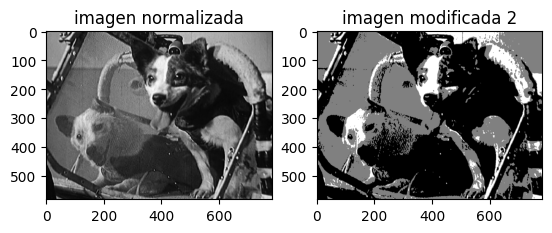

In [21]:
plt.subplot(1,2,1)
plt.imshow(imagen_gris_norm,cmap='gray')
plt.title('imagen normalizada')

plt.subplot(1,2,2)
plt.imshow(intesidad3, cmap='gray')
plt.title('imagen modificada 2')

plt.show()

5. Definir una función niveles_intensidad_n(img,N) que tome como entrada la imagen de prueba en escala de
 grises normalizada entre 0 y 1 y una variable N correspondiente a un número de niveles de intensidad. La función debe
 producir como salida una imagen con N niveles de intensidad.

In [22]:
def niveles_intensidad_n(img,N):
    im_modificada= np.floor(img*N)/N
    return im_modificada

6. Graficar, una al lado de la otra, la imagen original, y la imagen con 2, 4, 8, 16 y 32 niveles de intensidad.

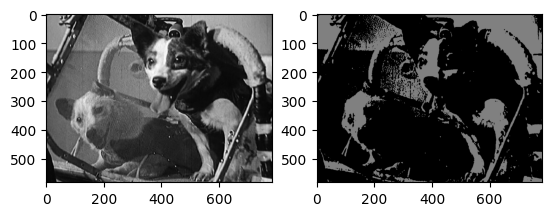

In [23]:
img_2=niveles_intensidad_n(imagen_gris_norm,2)
plt.subplot(1,2,1)
plt.imshow(imagen_gris_norm,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_2, cmap='gray')

plt.show()

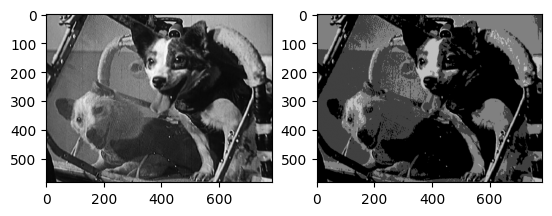

In [24]:
img_4=niveles_intensidad_n(imagen_gris_norm,4)
plt.subplot(1,2,1)
plt.imshow(imagen_gris_norm,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_4, cmap='gray')

plt.show()

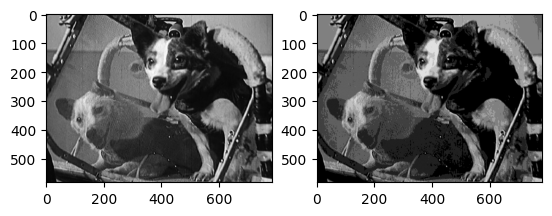

In [25]:
img_8=niveles_intensidad_n(imagen_gris_norm,8)
plt.subplot(1,2,1)
plt.imshow(imagen_gris_norm,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_8, cmap='gray')

plt.show()

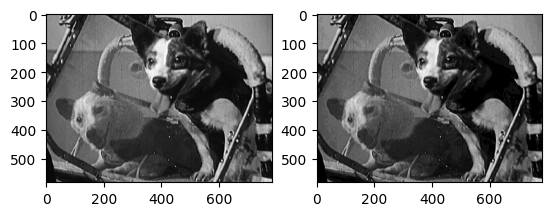

In [26]:
img_16=niveles_intensidad_n(imagen_gris_norm,16)
plt.subplot(1,2,1)
plt.imshow(imagen_gris_norm,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_16, cmap='gray')

plt.show()

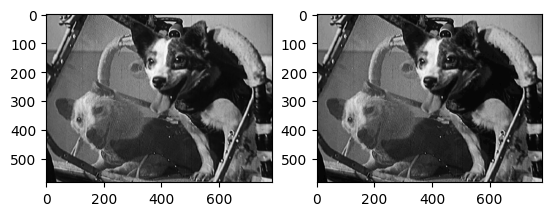

In [27]:
img_32=niveles_intensidad_n(imagen_gris_norm,32)
plt.subplot(1,2,1)
plt.imshow(imagen_gris_norm,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_32, cmap='gray')

plt.show()

7. Indique (y grafique) el valor N de niveles de intensidad a partir del cual no sea capaz de percibir una diferencia entre la
 imagen original y la imagen producida por la función niveles_intensidad_n(img,N).

    * A partir del nivel 32 ya es complicado percibir una variación en la calidad de la imagen  

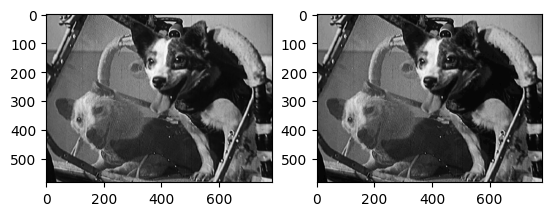

In [28]:
img_32=niveles_intensidad_n(imagen_gris_norm,32)
plt.subplot(1,2,1)
plt.imshow(imagen_gris_norm,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_32, cmap='gray')

plt.show()